# 1) Standard imports

In [1]:
import numpy as np 
import pandas as pd 
import re
import urlextract
import xlrd


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

# 2)Importing Data

In [2]:
train = pd.read_excel(r"Twitter_Balenciaga.xlsx")

In [3]:
train.head(18)

,id,content,date
0,1.620207e+18,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h,2023-01-30 23:46:10+00:00
1,1.620206e+18,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP",2023-01-30 23:44:31+00:00
2,1.620204e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C,2023-01-30 23:33:43+00:00
3,1.620151e+18,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®,2023-01-30 20:04:35+00:00
4,1.620142e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4,2023-01-30 19:30:19+00:00
5,1.620133e+18,WTF? Why is this happening??? #Balenciaga https://t.co/tJLYkONwP2,2023-01-30 18:51:52+00:00
6,1.620127e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @kmullen1019 #poshmark #fashion #style #shopmycloset #balenciaga #freepeople #dannynicole: https://t.co/kBUmpEcdc4 https://t.co/p3n0TDQp5Y,2023-01-30 18:29:23+00:00
7,1.620118e+18,LETS TALK ABOUT BALENCIAGA ðŸ’€ #shorts #makeup #balenciaga https://t.co/mlTDFCx0Z3 via @YouTube,2023-01-30 17:51:43+00:00
8,1.620117e+18,Sadly it's much bigger than #Balenciaga #BalenciagaGate gotta start somewhere,2023-01-30 17:48:02+00:00
9,1.620115e+18,@skims All the bot replies should tell you something....we don't support pedos and the abuse of children. You dress your OWN CHILD in a GIMP mask and call it fashion. You're sick and satanic. #balenciaga #cancelskims #cancelkimkardashian ðŸ¤®ðŸ¤®ðŸ¤®ðŸ¤®ð,2023-01-30 17:42:35+00:00


In [33]:
train.shape[0]

29161

In [34]:
##Replace 'Text' column to 'Comments'

train.rename(columns = {'content':'Comments'}, inplace = True)

In [35]:
train.columns

Index(['id', 'Comments', 'date'], dtype='object')

# 3)Comments - Descriptive Stats

In [36]:
train[train.columns[-1]].count()

29161

In [37]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [id, Comments, date]
Index: []


In [38]:
# Drop rows with null values in 'Comments' column
train = train.dropna(subset=['Comments'])

In [39]:
train.shape

(29161, 3)

In [40]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [id, Comments, date]
Index: []


In [41]:
train['Comments'] = train['Comments'].astype(str)

In [42]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

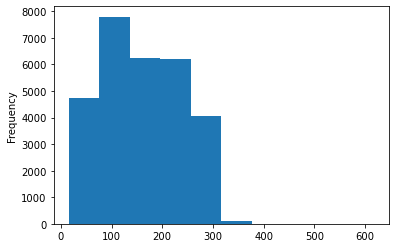

In [43]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - URL & Punctuation Removal

In [44]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [45]:
train.head(10)

,id,Comments,date,text_length
0,1.620207e+18,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more",2023-01-30 23:44:31+00:00,173
2,1.620204e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden:,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh:,2023-01-30 19:30:19+00:00,195
5,1.620133e+18,WTF? Why is this happening??? #Balenciaga,2023-01-30 18:51:52+00:00,65
6,1.620127e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @kmullen1019 #poshmark #fashion #style #shopmycloset #balenciaga #freepeople #dannynicole:,2023-01-30 18:29:23+00:00,218
7,1.620118e+18,LETS TALK ABOUT BALENCIAGA ðŸ’€ #shorts #makeup #balenciaga via @YouTube,2023-01-30 17:51:43+00:00,96
8,1.620117e+18,Sadly it's much bigger than #Balenciaga #BalenciagaGate gotta start somewhere,2023-01-30 17:48:02+00:00,78
9,1.620115e+18,@skims All the bot replies should tell you something....we don't support pedos and the abuse of children. You dress your OWN CHILD in a GIMP mask and call it fashion. You're sick and satanic. #balenciaga #cancelskims #cancelkimkardashian ðŸ¤®ðŸ¤®ðŸ¤®ðŸ¤®ð,2023-01-30 17:42:35+00:00,255


In [46]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [47]:
train['Comments'].apply(remove_punctuations)

0                                                    Latest Podcast is out now  Balenciaga Is Run By Satanists  JUST THINK 5  via YouTube  Balenciagapedos Balenciaga satan satanist SATANIC pedophelia podcastshow podcast podcastlife PodcastAndChill podcaster podcasting lucifer luciferian h
1                                                                                                                                                                               Over 500 brands including Gucci OffWhite Balenciaga MaisonMargiela MarineSerre SaintLaurent fashion and many more
2                                                                                                                                                      So good I had to share Check out all the items Im loving on Poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                                                 

In [48]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

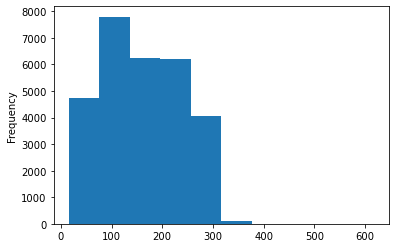

In [49]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - lower case

In [50]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                                                    latest podcast is out now  balenciaga is run by satanists  just think 5  via youtube  balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                                                                               over 500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion and many more
2                                                                                                                                                      so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                                                 

In [51]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

# 5) Tweet tokenization

In [52]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
train['Tokens'] = train['Comments'].apply(tokenize_tweet)

In [53]:
train.head(20)

,id,Comments,date,text_length,Tokens
0,1.620207e+18,latest podcast is out now balenciaga is run by satanists just think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280,"[latest, podcast, is, out, now, balenciaga, is, run, by, satanists, just, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]"
1,1.620206e+18,over 500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion and many more,2023-01-30 23:44:31+00:00,173,"[over, 500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, and, many, more]"
2,1.620204e+18,so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]"
3,1.620151e+18,skkn nothing we dont support pedos and those who support child abuse and exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,2023-01-30 20:04:35+00:00,160,"[skkn, nothing, we, dont, support, pedos, and, those, who, support, child, abuse, and, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]"
4,1.620142e+18,so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh]"
5,1.620133e+18,wtf why is this happening balenciaga,2023-01-30 18:51:52+00:00,65,"[wtf, why, is, this, happening, balenciaga]"
6,1.620127e+18,so good i had to share check out all the items im loving on poshmarkapp from kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, from, kmullen, 1019, poshmark, fashion, style, shopmycloset, balenciaga, freepeople, dannynicole]"
7,1.620118e+18,lets talk about balenciaga ðÿ’€ shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96,"[lets, talk, about, balenciaga, ðÿ, ’, €, shorts, makeup, balenciaga, via, youtube]"
8,1.620117e+18,sadly its much bigger than balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78,"[sadly, its, much, bigger, than, balenciaga, balenciagagate, gotta, start, somewhere]"
9,1.620115e+18,skims all the bot replies should tell you somethingwe dont support pedos and the abuse of children you dress your own child in a gimp mask and call it fashion youre sick and satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,2023-01-30 17:42:35+00:00,255,"[skims, all, the, bot, replies, should, tell, you, somethingwe, dont, support, pedos, and, the, abuse, of, children, you, dress, your, own, child, in, a, gimp, mask, and, call, it, fashion, youre, sick, and, satanic, balenciaga, cancelskims, cancelkimkardashian, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ð]"


# 6) Cleaning - Remove Stopwords,numbers & special characters

In [54]:
# Get Stopwords
stop = stopwords.words('english')

In [55]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0        [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]
1                                                                                                                                    [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]
2                                                                                                                     [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]
3                                                                                                 [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®]
4                   

In [56]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0        latest podcast balenciaga run satanists think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                       500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many
2                                                                                                           good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                      skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®
4                                                                                                             good share

In [57]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [58]:
train.head(10)

,id,Comments,date,text_length,Tokens
0,1.620207e+18,latest podcast balenciaga run satanists think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280,"[latest, podcast, is, out, now, balenciaga, is, run, by, satanists, just, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]"
1,1.620206e+18,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173,"[over, 500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, and, many, more]"
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]"
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,2023-01-30 20:04:35+00:00,160,"[skkn, nothing, we, dont, support, pedos, and, those, who, support, child, abuse, and, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]"
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh]"
5,1.620133e+18,wtf happening balenciaga,2023-01-30 18:51:52+00:00,65,"[wtf, why, is, this, happening, balenciaga]"
6,1.620127e+18,good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, from, kmullen, 1019, poshmark, fashion, style, shopmycloset, balenciaga, freepeople, dannynicole]"
7,1.620118e+18,lets talk balenciaga ðÿ’€ shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96,"[lets, talk, about, balenciaga, ðÿ, ’, €, shorts, makeup, balenciaga, via, youtube]"
8,1.620117e+18,sadly much bigger balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78,"[sadly, its, much, bigger, than, balenciaga, balenciagagate, gotta, start, somewhere]"
9,1.620115e+18,skims bot replies tell somethingwe dont support pedos abuse children dress child gimp mask call fashion youre sick satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,2023-01-30 17:42:35+00:00,255,"[skims, all, the, bot, replies, should, tell, you, somethingwe, dont, support, pedos, and, the, abuse, of, children, you, dress, your, own, child, in, a, gimp, mask, and, call, it, fashion, youre, sick, and, satanic, balenciaga, cancelskims, cancelkimkardashian, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ð]"


In [59]:
##Remove characters other than emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u2764"                  # heart symbol
        u"\U0001F644"              # rolling eyes face
        u"\U000024C2-\U0001F251"  # miscellaneous symbols
        u"\U0001f926-\U0001f937"  # people and body-related symbols
        u"\u2600-\u2B55"          # weather-related symbols
        u"\u200d"                 # zero width joiner
        u"\u23cf"                 # eject symbol
        u"\u23e9"                 # fast forward symbol
        u"\u231a"                 # watch symbol
        u"\ufe0f"                 # emoji variation selector
                                  
                           "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r' ', text)  # replace emoticons with a space
    text = re.sub(r'[^\w\s]', '', text)  # remove non-word characters except spaces
    return text.strip()



In [60]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [61]:
##Remove numbers

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [62]:
train.head(500)

,id,Comments,date,text_length,Tokens
0,1.620207e+18,latest podcast balenciaga run satanists think via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280,"[latest, podcast, is, out, now, balenciaga, is, run, by, satanists, just, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]"
1,1.620206e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173,"[over, 500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, and, many, more]"
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]"
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿðÿðÿðÿðÿðÿ,2023-01-30 20:04:35+00:00,160,"[skkn, nothing, we, dont, support, pedos, and, those, who, support, child, abuse, and, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]"
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh]"
...,...,...,...,...,...
495,1.616575e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-20 23:15:51+00:00,173,"[over, 500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, and, many, more]"
496,1.616556e+18,romenyla humblegenius gucci also company balenciaga ad weirdo harrystyles getting naked front toddler mattress empty room clearly plain site care,2023-01-20 21:59:48+00:00,234,"[romenyla, humblegenius, 123, gucci, just, did, also, which, is, the, same, company, as, balenciaga, an, ad, with, weirdo, harrystyles, getting, naked, in, front, of, a, toddler, mattress, in, a, empty, room, they, clearly, do, this, in, plain, site, and, do, not, care]"
497,1.616542e+18,nasty girl lie like completely supported wef british government like climate activists paid bought vaccinedeath vaccine vaccinedeaths vaccinegenocide vaccin wefpuppets wef balenciaga balenciagapedos pedofila grooming,2023-01-20 21:05:17+00:00,275,"[what, a, nasty, girl, to, lie, like, that, and, completely, supported, by, the, wef, and, the, british, government, like, the, climate, activists, paid, and, bought, vaccinedeath, vaccine, vaccinedeaths, vaccinegenocide, vaccin, wefpuppets, wef, balenciaga, balenciagapedos, pedofila, grooming]"
498,1.616542e+18,jordanbpeterson advice come yes woman mysogynistic woman spell see im female patriarchy ooh complicated vaccinedeath vaccine balenciaga balenciagapedos pedofila grooming hollywoodstudios,2023-01-20 21:03:13+00:00,275,"[on, jordanbpeterson, advice, i, have, come, out, and, yes, i, am, a, woman, i, am, a, mysogynistic, woman, how, do, you, spell, that, see, im, female, down, with, the, patriarchy, ooh, this, is, complicated, vaccinedeath, vaccine, balenciaga, balenciagapedos, pedofila, grooming, hollywoodstudios]"


In [63]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [64]:
# apply the remove_invalid_chars function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_invalid_chars)



In [65]:
train.head(20)

,id,Comments,date,text_length,Tokens
0,1.620207e+18,latest podcast balenciaga run satanists think via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280,"[latest, podcast, is, out, now, balenciaga, is, run, by, satanists, just, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]"
1,1.620206e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173,"[over, 500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, and, many, more]"
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]"
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims,2023-01-30 20:04:35+00:00,160,"[skkn, nothing, we, dont, support, pedos, and, those, who, support, child, abuse, and, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]"
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh]"
5,1.620133e+18,wtf happening balenciaga,2023-01-30 18:51:52+00:00,65,"[wtf, why, is, this, happening, balenciaga]"
6,1.620127e+18,good share check items im loving poshmarkapp kmullen poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218,"[so, good, i, had, to, share, check, out, all, the, items, im, loving, on, poshmarkapp, from, kmullen, 1019, poshmark, fashion, style, shopmycloset, balenciaga, freepeople, dannynicole]"
7,1.620118e+18,lets talk balenciaga shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96,"[lets, talk, about, balenciaga, ðÿ, ’, €, shorts, makeup, balenciaga, via, youtube]"
8,1.620117e+18,sadly much bigger balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78,"[sadly, its, much, bigger, than, balenciaga, balenciagagate, gotta, start, somewhere]"
9,1.620115e+18,skims bot replies tell somethingwe dont support pedos abuse children dress child gimp mask call fashion youre sick satanic balenciaga cancelskims cancelkimkardashian,2023-01-30 17:42:35+00:00,255,"[skims, all, the, bot, replies, should, tell, you, somethingwe, dont, support, pedos, and, the, abuse, of, children, you, dress, your, own, child, in, a, gimp, mask, and, call, it, fashion, youre, sick, and, satanic, balenciaga, cancelskims, cancelkimkardashian, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ðÿ, ¤, ®, ð]"


# 6)Lemmatize

In [66]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [68]:
# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

0        latest podcast balenciaga run satanists think  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                          brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many
2                                                                                                          good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                             skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims 
4                                                                                                            good share chec

In [69]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

## 7) POS Tagging

In [70]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [72]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [73]:
train['POS_Tagged']

0        [(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]
1                                                                                                                                                                                                                       [(brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ)]
2                                                                                                                                                                           [(good, JJ), (share, NN), (check, VB), (items, NNS), (im, 

## 8)Word-Embeddings

In [74]:
import pandas as pd
from textblob import TextBlob
import gensim.downloader as api


In [75]:
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load('glove-wiki-gigaword-100')

import re

def clean_text(text):
    text = str(text)
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove any non-word character and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [76]:
# Clean the comments
train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [77]:
# Create word embeddings for each comment
def create_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in glove_model:
            embeddings.append(glove_model[word])
    return embeddings

train['embeddings'] = train['cleaned_comments'].apply(create_embeddings)

In [78]:
# Calculate the sentiment score for each comment
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

train['sentiment_score'] = train['cleaned_comments'].apply(calculate_sentiment_score)

In [79]:
# Calculate the polarity scores and sentiment tags
polarity = [TextBlob(comment).sentiment.polarity for comment in train['Comments']]
sentiment = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity]

In [80]:
# Add the new columns to the train DataFrame
train['polarity'] = polarity
train['sentiment'] = sentiment

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29161 entries, 0 to 29160
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                29161 non-null  float64
 1   Comments          29161 non-null  object 
 2   date              29161 non-null  object 
 3   text_length       29161 non-null  int64  
 4   Tokens            29161 non-null  object 
 5   POS_Tagged        29161 non-null  object 
 6   cleaned_comments  29161 non-null  object 
 7   embeddings        29161 non-null  object 
 8   sentiment_score   29161 non-null  float64
 9   polarity          29161 non-null  float64
 10  sentiment         29161 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.4+ MB


In [82]:
# Count the number of comments for each sentiment
train['sentiment'].value_counts()



neutral     11828
positive     8697
negative     8636
Name: sentiment, dtype: int64

In [83]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [84]:
# Define the SVM classifier
svm_clf = LinearSVC(random_state=42, multi_class='ovr')

In [85]:
# Create embeddings for each comment
train['embeddings'] = train['cleaned_comments'].apply(create_embeddings)

In [86]:
# Calculate the actual sentiment labels for each comment
polarity = [TextBlob(comment).sentiment.polarity for comment in train['Comments']]
sentiment = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity]
train['sentiment'] = sentiment

In [87]:
# Concatenate the GloVe embeddings for each comment into a single feature vector
train_embeddings = train['embeddings'].apply(lambda x: [i for sublist in x for i in sublist])
train_embeddings = train_embeddings.apply(lambda x: np.array(x).mean(axis=0))
train_embeddings = np.stack(train_embeddings.values)

C:\Users\admin\AppData\Local\Temp\ipykernel_8720\2558960413.py:3: RuntimeWarning: Mean of empty slice.
  train_embeddings = train_embeddings.apply(lambda x: np.array(x).mean(axis=0))


In [88]:
train_embeddings_2d = train_embeddings.reshape(-1, 1)

In [89]:
train_embeddings_2d_df = pd.DataFrame(train_embeddings_2d)

In [90]:
import numpy as np

print(np.isnan(train_embeddings_2d).sum())

print(np.isinf(train_embeddings_2d).sum())

47
0


In [91]:
train_embeddings_2d = np.nan_to_num(train_embeddings_2d, nan=0)

In [92]:
svm_clf.fit(train_embeddings_2d, train['sentiment'])

LinearSVC(random_state=42)

In [93]:
train_embeddings_2d = train_embeddings.reshape(train_embeddings.shape[0], -1)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
# Split data into training and testing sets
train, test = train_test_split(train, test_size=0.2, random_state=42)

In [96]:
# Create embeddings for each comment in the training data
train['embeddings'] = train['cleaned_comments'].apply(create_embeddings)

In [97]:
# Calculate the actual sentiment labels for each comment in the training data        
polarity = [TextBlob(comment).sentiment.polarity for comment in train['Comments']]
sentiment = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity]
train['sentiment'] = sentiment

In [98]:
# Concatenate the GloVe embeddings for each comment in the training data into a single feature vector 
train_embeddings = train['embeddings'].apply(lambda x: [i for sublist in x for i in sublist])
train_embeddings = train_embeddings.apply(lambda x: np.array(x).mean(axis=0))
train_embeddings = np.stack(train_embeddings.values)

train_embeddings_2d = train_embeddings.reshape(-1, 1)

train_embeddings_2d_df = pd.DataFrame(train_embeddings_2d)

C:\Users\admin\AppData\Local\Temp\ipykernel_8720\3497977155.py:3: RuntimeWarning: Mean of empty slice.
  train_embeddings = train_embeddings.apply(lambda x: np.array(x).mean(axis=0))


In [99]:
# Create embeddings for each comment in the test data
test['embeddings'] = test['cleaned_comments'].apply(create_embeddings)

In [100]:
# Calculate the actual sentiment labels for each comment in the test data
polarity = [TextBlob(comment).sentiment.polarity for comment in test['Comments']]
sentiment = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity]
test['sentiment'] = sentiment

In [101]:
# Concatenate the GloVe embeddings for each comment in the test data into a single feature vector
test_embeddings = test['embeddings'].apply(lambda x: [i for sublist in x for i in sublist])
test_embeddings = test_embeddings.apply(lambda x: np.array(x).mean(axis=0))
test_embeddings = np.stack(test_embeddings.values)

C:\Users\admin\AppData\Local\Temp\ipykernel_8720\3776866961.py:3: RuntimeWarning: Mean of empty slice.
  test_embeddings = test_embeddings.apply(lambda x: np.array(x).mean(axis=0))


In [102]:
test_embeddings_2d = test_embeddings.reshape(-1, 1)

test_embeddings_2d_df = pd.DataFrame(test_embeddings_2d)

In [103]:
import numpy as np

# Replace NaN values with 0
test_embeddings_2d = np.nan_to_num(test_embeddings_2d)

In [104]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, precision_score, recall_score

In [105]:
# Make predictions on the test data
test_pred = svm_clf.predict(test_embeddings_2d)

In [106]:
# Calculate accuracy and F1 score
accuracy = accuracy_score(test['sentiment'], test_pred)
f1 = f1_score(test['sentiment'], test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.3997942739585119
F1 Score: 0.23175776119449104


In [107]:
# Compute precision and recall
precision = precision_score(test['sentiment'], test_pred, average='weighted')
recall = recall_score(test['sentiment'], test_pred, average='weighted')

# Compute confusion matrix
confusion_mat = confusion_matrix(test['sentiment'], test_pred)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Confusion matrix:")
print(confusion_mat)

Precision: 0.1991
Recall: 0.3998
Confusion matrix:
[[   4 1727    0]
 [  26 2328    0]
 [   2 1746    0]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
